The generated data is within the predefined ranges.
Generated new independent testing data is within specified ranges.
Epoch [100/2000], Loss: 0.0001
Epoch [200/2000], Loss: 0.0000
Epoch [300/2000], Loss: 0.0000
Epoch [400/2000], Loss: 0.0000
Epoch [500/2000], Loss: 0.0000
Epoch [600/2000], Loss: 0.0000
Epoch [700/2000], Loss: 0.0000
Epoch [800/2000], Loss: 0.0000
Epoch [900/2000], Loss: 0.0000
Epoch [1000/2000], Loss: 0.0000
Epoch [1100/2000], Loss: 0.0000
Epoch [1200/2000], Loss: 0.0000
Epoch [1300/2000], Loss: 0.0000
Epoch [1400/2000], Loss: 0.0000
Epoch [1500/2000], Loss: 0.0000
Epoch [1600/2000], Loss: 0.0000
Epoch [1700/2000], Loss: 0.0000
Epoch [1800/2000], Loss: 0.0000
Epoch [1900/2000], Loss: 0.0000
Epoch [2000/2000], Loss: 0.0000
Average Difference on New Independent Test Set: -0.0062
Standard Deviation on New Independent Test Set: 0.0134
Mean Squared Error (MSE) on Testing Set: 0.0002
MAPE (Mean Absolute Percentage Error) on Testing Set: 2800737959205815430617482970992240205

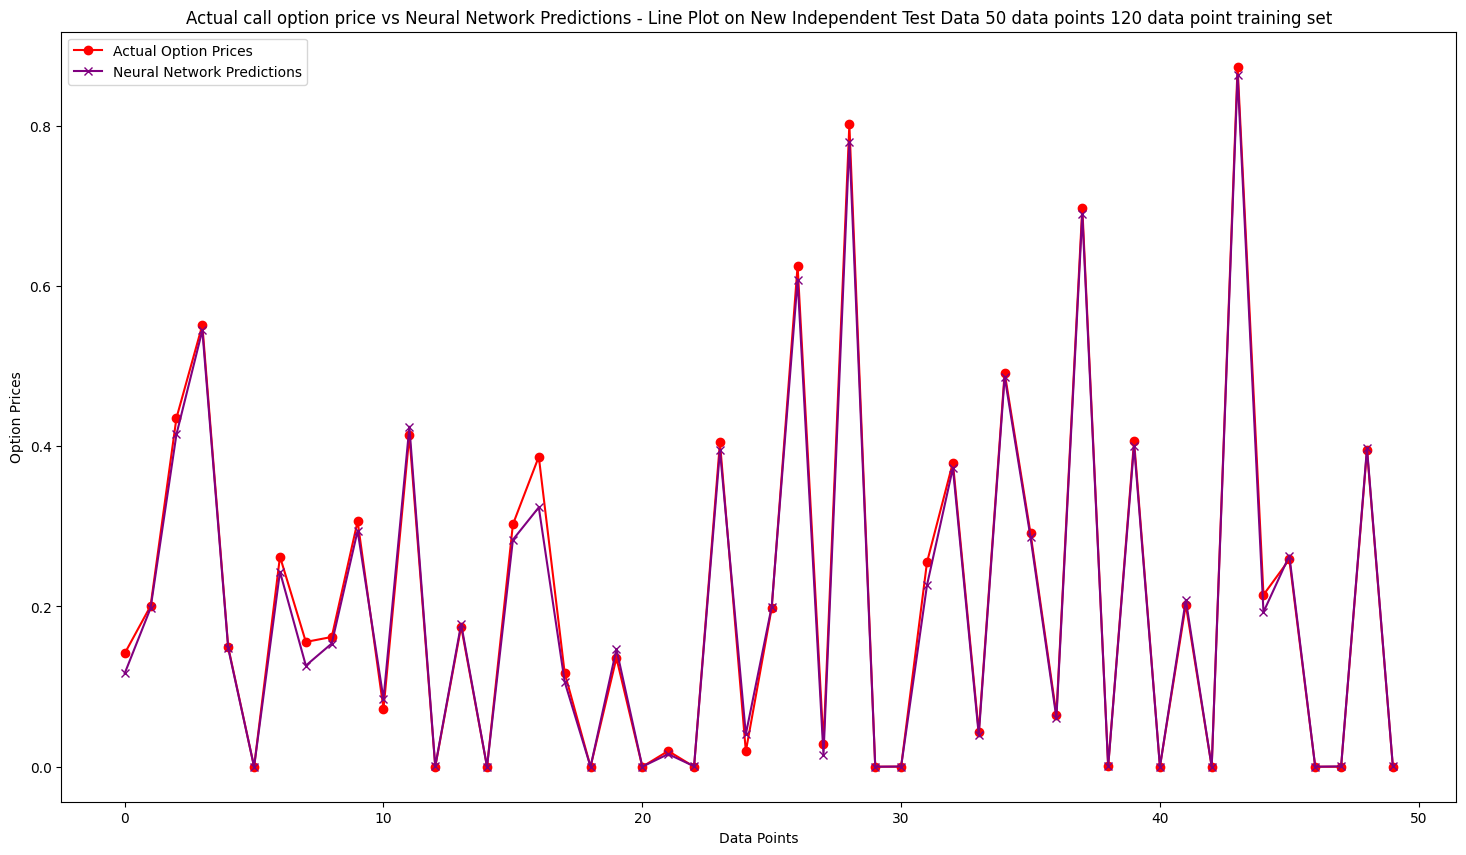

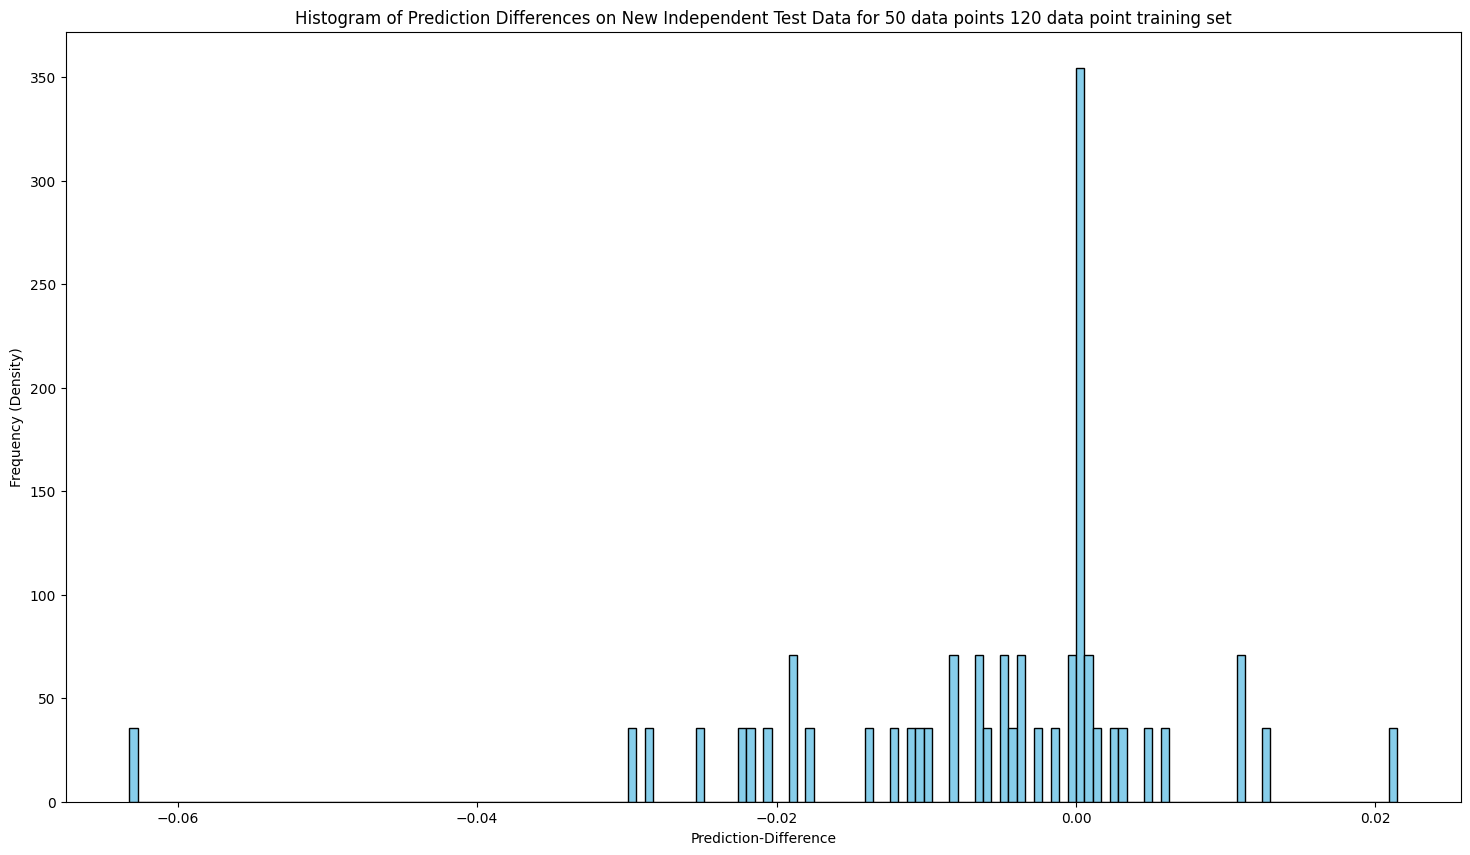

In [1]:
import numpy as np
import pandas as pd
from scipy.stats import norm
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
import random

seed = 279
torch.manual_seed(seed)
np.random.seed(seed)
random.seed(seed)



def BlackScholes_Call_Price(Spot_Price, Strike_Price, Time_Maturity, Risk_FreeRate, Volatility):
    assert Spot_Price.shape == Strike_Price.shape == Time_Maturity.shape == Risk_FreeRate.shape == Volatility.shape, "Input array shapes do not match"
    D1 = (np.log(Spot_Price/ Strike_Price) + (Risk_FreeRate + 0.5 * Volatility ** 2) * Time_Maturity) / (Volatility * np.sqrt(Time_Maturity))
    D2 = D1 - Volatility * np.sqrt(Time_Maturity)
    NormalD1 = norm.cdf(D1)
    NormalD2 = norm.cdf(D2)
    Call_Price = Spot_Price * NormalD1 - Strike_Price * np.exp(-Risk_FreeRate * Time_Maturity) * NormalD2
    return Call_Price, NormalD1, NormalD2



def  Check_Gen_Data(data):
    SpotPriceRange = (0, 1)
    StrikePriceRange = (0, 1)
    RiskFreeRateRange = (0, 0.2)
    TimeMaturityRange = (0.04, 2)
    VolatilityRange = (0, 0.35)

    CheckTheSpotPrice= all(SpotPriceRange[0] <= data['Spot-Price']) and all(data['Spot-Price'] <= SpotPriceRange[1])
    CheckTheStrikePrice = all(StrikePriceRange[0] <= data['Strike-Price']) and all(data['Strike-Price'] <= StrikePriceRange[1])
    CheckTheRiskFreeRate = all(RiskFreeRateRange[0] <= data['Risk-Free-Rate']) and all(data['Risk-Free-Rate'] <= RiskFreeRateRange[1])
    CheckTheTime_to_maturity = all(TimeMaturityRange[0] <= data['Time-to-Maturity']) and all(data['Time-to-Maturity'] <= TimeMaturityRange[1])
    CheckTheVolatility= all(VolatilityRange[0] <= data['Volatility']) and all(data['Volatility'] <= VolatilityRange[1])
    return CheckTheSpotPrice and CheckTheStrikePrice and CheckTheRiskFreeRate and CheckTheTime_to_maturity and CheckTheVolatility

size = 120
np.random.seed(279)
Spot_Price = np.random.uniform(low=0, high=1, size=size)
Strike_Price = np.random.uniform(low=0, high=1, size=size)
TimeMaturity = np.random.uniform(low=0.04, high=2, size=size)
RiskFreeRate = np.random.uniform(low=0, high=0.2, size=size)
Volatility = np.random.uniform(low=0, high=0.35, size=size)

OptionPrices, NormalD1, NormalD2 = BlackScholes_Call_Price(Spot_Price, Strike_Price, TimeMaturity, RiskFreeRate, Volatility)

data = pd.DataFrame({
    'Spot-Price': Spot_Price,
    'Strike-Price': Strike_Price,
    'Risk-Free-Rate': RiskFreeRate,
    'Time-to-Maturity': TimeMaturity,
    'Volatility': Volatility,
    'Call-Option-Price': OptionPrices,


})

Is_the_data_correct =  Check_Gen_Data(data)

if Is_the_data_correct:
    print("The generated data is within the predefined ranges.")
else:
    print("The generated data is not within the predefined ranges.")

features = data[['Spot-Price', 'Strike-Price', 'Risk-Free-Rate', 'Time-to-Maturity', 'Volatility']]
Data_Target = data['Call-Option-Price']


scaler = MinMaxScaler()

ScaledFeatures = scaler.fit_transform(features)

XTrain, TestX, YTrain, TestY = train_test_split (ScaledFeatures, Data_Target, test_size=0.2, random_state=279)

XTrain_tensor = torch.tensor(XTrain, dtype=torch.float32)
YTrain_tensor = torch.tensor(YTrain.values, dtype=torch.float32).view(-1, 1)

TestX_tensor = torch.tensor(TestX, dtype=torch.float32)


Input_Param = XTrain_tensor.shape[1]
Output_param = 1




class BlackScholesNN(nn.Module):
    def __init__(self, Input_Param, Output_param):
        super(BlackScholesNN, self).__init__()
        self.L1 = nn.Linear(Input_Param, 150)
        self.RELU_1 = nn.ReLU()
        self.L2 = nn.Linear(150, 100)
        self.RELU_2 = nn.ReLU()
        self.L3 = nn.Linear(100, 80)
        self.RELU_3 = nn.ReLU()
        self.L4 = nn.Linear(80, 60)
        self.RELU_4 = nn.ReLU()
        self.L5 = nn.Linear(60, 40)
        self.RELU_5 = nn.ReLU()
        self.L6 = nn.Linear(40, 20)
        self.RELU_6 = nn.ReLU()
        self.L7 = nn.Linear(20, Output_param)

    def forward(self, x):
        x = self.L1(x)
        x = self.RELU_1(x)
        x = self.L2(x)
        x = self.RELU_2(x)
        x = self.L3(x)
        x = self.RELU_3(x)
        x = self.L4(x)
        x = self.RELU_4(x)
        x = self.L5(x)
        x = self.RELU_5(x)
        x = self.L6(x)
        x = self.RELU_6(x)
        x = self.L7(x)
        return x

model = BlackScholesNN(Input_Param, Output_param)


Number_of_DataPoints_new = 50
np.random.seed(279)

Spot_Prices_For_test = np.random.uniform(low=0, high=1, size=Number_of_DataPoints_new)
Strike_Prices_For_test = np.random.uniform(low=0, high=1, size=Number_of_DataPoints_new)
Risk_FreeRates_For_test = np.random.uniform(low=0, high=0.2, size=Number_of_DataPoints_new)
Time_Maturities__For_test = np.random.uniform(low=0.04, high=2, size=Number_of_DataPoints_new)
VolatilityRanges_For_test = np.random.uniform(low=0, high=0.35, size=Number_of_DataPoints_new)

New_OptionPrices, _, _ = BlackScholes_Call_Price(Spot_Prices_For_test, Strike_Prices_For_test, Time_Maturities__For_test, Risk_FreeRates_For_test, VolatilityRanges_For_test)
DataFrame_For_test= pd.DataFrame({
    'Spot-Price': Spot_Prices_For_test,
    'Strike-Price': Strike_Prices_For_test,
    'Risk-Free-Rate': Risk_FreeRates_For_test,
    'Time-to-Maturity': Time_Maturities__For_test,
    'Volatility': VolatilityRanges_For_test,
    'Call-Option-Price': New_OptionPrices
})

Is_the_data_correct_new = Check_Gen_Data(DataFrame_For_test)

if Is_the_data_correct_new:
    print("Generated new independent testing data is within specified ranges.")
else:
    print("Generated new independent testing data is not within specified ranges.")

features_new = DataFrame_For_test[['Spot-Price', 'Strike-Price', 'Risk-Free-Rate', 'Time-to-Maturity', 'Volatility']]
Data_Target_new = DataFrame_For_test['Call-Option-Price']

ScaledFeatures_new = scaler.transform(features_new)

TestX_tensor_new = torch.tensor(ScaledFeatures_new, dtype=torch.float32)

ErrorCriterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

Epoch_Size = 2000

for Ep in range(Epoch_Size):
    Target_out = model(XTrain_tensor)
    loss = ErrorCriterion(Target_out, YTrain_tensor)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if (Ep + 1) % 100 == 0:
        print(f'Epoch [{Ep+1}/{Epoch_Size}], Loss: {loss.item():.4f}')

with torch.no_grad():
    model.eval()
    test_predictions = model(TestX_tensor)



TestPredsRelu = torch.relu(test_predictions)

if torch.any(TestPredsRelu < 0):
    Random_Coeff = torch.rand_like(TestPredsRelu)
    Tailored_predictions = TestPredsRelu + Random_Coeff * (1 - TestPredsRelu)
else:
    Tailored_predictions = TestPredsRelu

Tailored_predictions_squeezed = Tailored_predictions.numpy().squeeze()

predictions_test = Tailored_predictions_squeezed.reshape(-1, 1)
AllNumpyTest = TestPredsRelu.numpy()

predictions_data_test = pd.DataFrame({
    'Neural Network Prediction': predictions_test.flatten()
})

features_new = DataFrame_For_test[['Spot-Price', 'Strike-Price', 'Risk-Free-Rate', 'Time-to-Maturity', 'Volatility']]
Data_Target_new = DataFrame_For_test['Call-Option-Price']

ScaledFeatures_new = scaler.transform(features_new)

TestX_tensor_new = torch.tensor(ScaledFeatures_new, dtype=torch.float32)
test_predictions_new = model(TestX_tensor_new)
test_predictions_newrelu = torch.relu(test_predictions_new)

if torch.any(test_predictions_newrelu < 0):
    Random_Coeff_new = torch.rand_like(test_predictions_newrelu)
    Tailored_predictions_new = test_predictions_newrelu + Random_Coeff_new * (1 - test_predictions_newrelu)
else:
    Tailored_predictions_new = test_predictions_newrelu

Tailored_predictions_squeezed_new = Tailored_predictions_new.detach().numpy().squeeze()

predictions_Test_New = Tailored_predictions_squeezed_new.reshape(-1, 1)
AllNumpyTest_New = Tailored_predictions_squeezed_new.reshape(-1, 1)


predictions_data_Test_New = pd.DataFrame({
    'Neural Network Prediction': predictions_Test_New.flatten()
})

def calculate_mape(actual, predicted):
  """Calculates the Mean Absolute Percentage Error (MAPE).

  Args:
    actual: A NumPy array or pandas Series of actual values.
    predicted: A NumPy array or pandas Series of predicted values.

  Returns:
    The MAPE as a float.
  """
  actual, predicted = np.array(actual), np.array(predicted)
  return np.mean(np.abs((actual - predicted) / actual)) * 100

Predictions_Data_Test_New = pd.concat([DataFrame_For_test, pd.DataFrame(AllNumpyTest_New, columns=['Neural Network Prediction'])], axis=1)

Predictions_Data_Test_New['Prediction-Difference'] = Predictions_Data_Test_New['Neural Network Prediction'] - Predictions_Data_Test_New['Call-Option-Price']

Average_Diff_Test = Predictions_Data_Test_New['Prediction-Difference'].mean()
Standard_Deviation_Test = Predictions_Data_Test_New['Prediction-Difference'].std()
MeanSquaredLoss = ((Predictions_Data_Test_New['Prediction-Difference'])**2).mean()


epsilon = 1e-8
actual = Predictions_Data_Test_New['Call-Option-Price'].values
predicted = Predictions_Data_Test_New['Neural Network Prediction'].values


denominator = np.where(actual == 0, epsilon, actual)
mape = np.mean(np.abs((actual - predicted) / denominator)) * 100

MAPE = mape
MAE = np.abs(Predictions_Data_Test_New['Prediction-Difference']).mean()


print(f'Average Difference on New Independent Test Set: {Average_Diff_Test:.4f}')
print(f'Standard Deviation on New Independent Test Set: {Standard_Deviation_Test:.4f}')
print(f'Mean Squared Error (MSE) on Testing Set: {MeanSquaredLoss:.4f}')
print(f'MAPE (Mean Absolute Percentage Error) on Testing Set: {MAPE:.4f}%')
print(f'MAE (Mean Absolute Error) on Testing Set: {MAE:.4f}')

Predictions_Data_Test_New['Average Difference'] = Average_Diff_Test
Predictions_Data_Test_New['Standard Deviation'] = Standard_Deviation_Test
Predictions_Data_Test_New['Mean Squared Error'] = MeanSquaredLoss
Predictions_Data_Test_New['MAPE'] = MAPE
Predictions_Data_Test_New['MAE'] = MAE




Predictions_Data_Test_New.to_csv('./test_for 50 data points_MeanSquaredLoss.csv', index=False)

plt.figure(figsize=(18, 10))
plt.plot(Predictions_Data_Test_New.index, Predictions_Data_Test_New['Call-Option-Price'], label='Actual Option Prices', marker='o', color='red')
plt.plot(Predictions_Data_Test_New.index, Predictions_Data_Test_New['Neural Network Prediction'], label='Neural Network Predictions', marker='x', color='purple')
plt.title('Actual call option price vs Neural Network Predictions - Line Plot on New Independent Test Data 50 data points 120 data point training set')
plt.xlabel('Data Points')
plt.ylabel('Option Prices')
plt.legend()
plt.savefig('./Line-plot_test_results_new_independent_data for 50 data points 120 data point training set .png')
plt.show()

plt.figure(figsize=(18, 10))
plt.hist(Predictions_Data_Test_New['Prediction-Difference'], bins=150, color='skyblue', edgecolor='black', density=True)
plt.title('Histogram of Prediction Differences on New Independent Test Data for 50 data points 120 data point training set')
plt.xlabel('Prediction-Difference')
plt.ylabel('Frequency (Density)')
plt.savefig('./histogram_test_results_new_independent_data for 50 data points 120 data point training set.png')
plt.show()


[*********************100%***********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['GLD']: YFRateLimitError('Too Many Requests. Rate limited. Try after a while.')


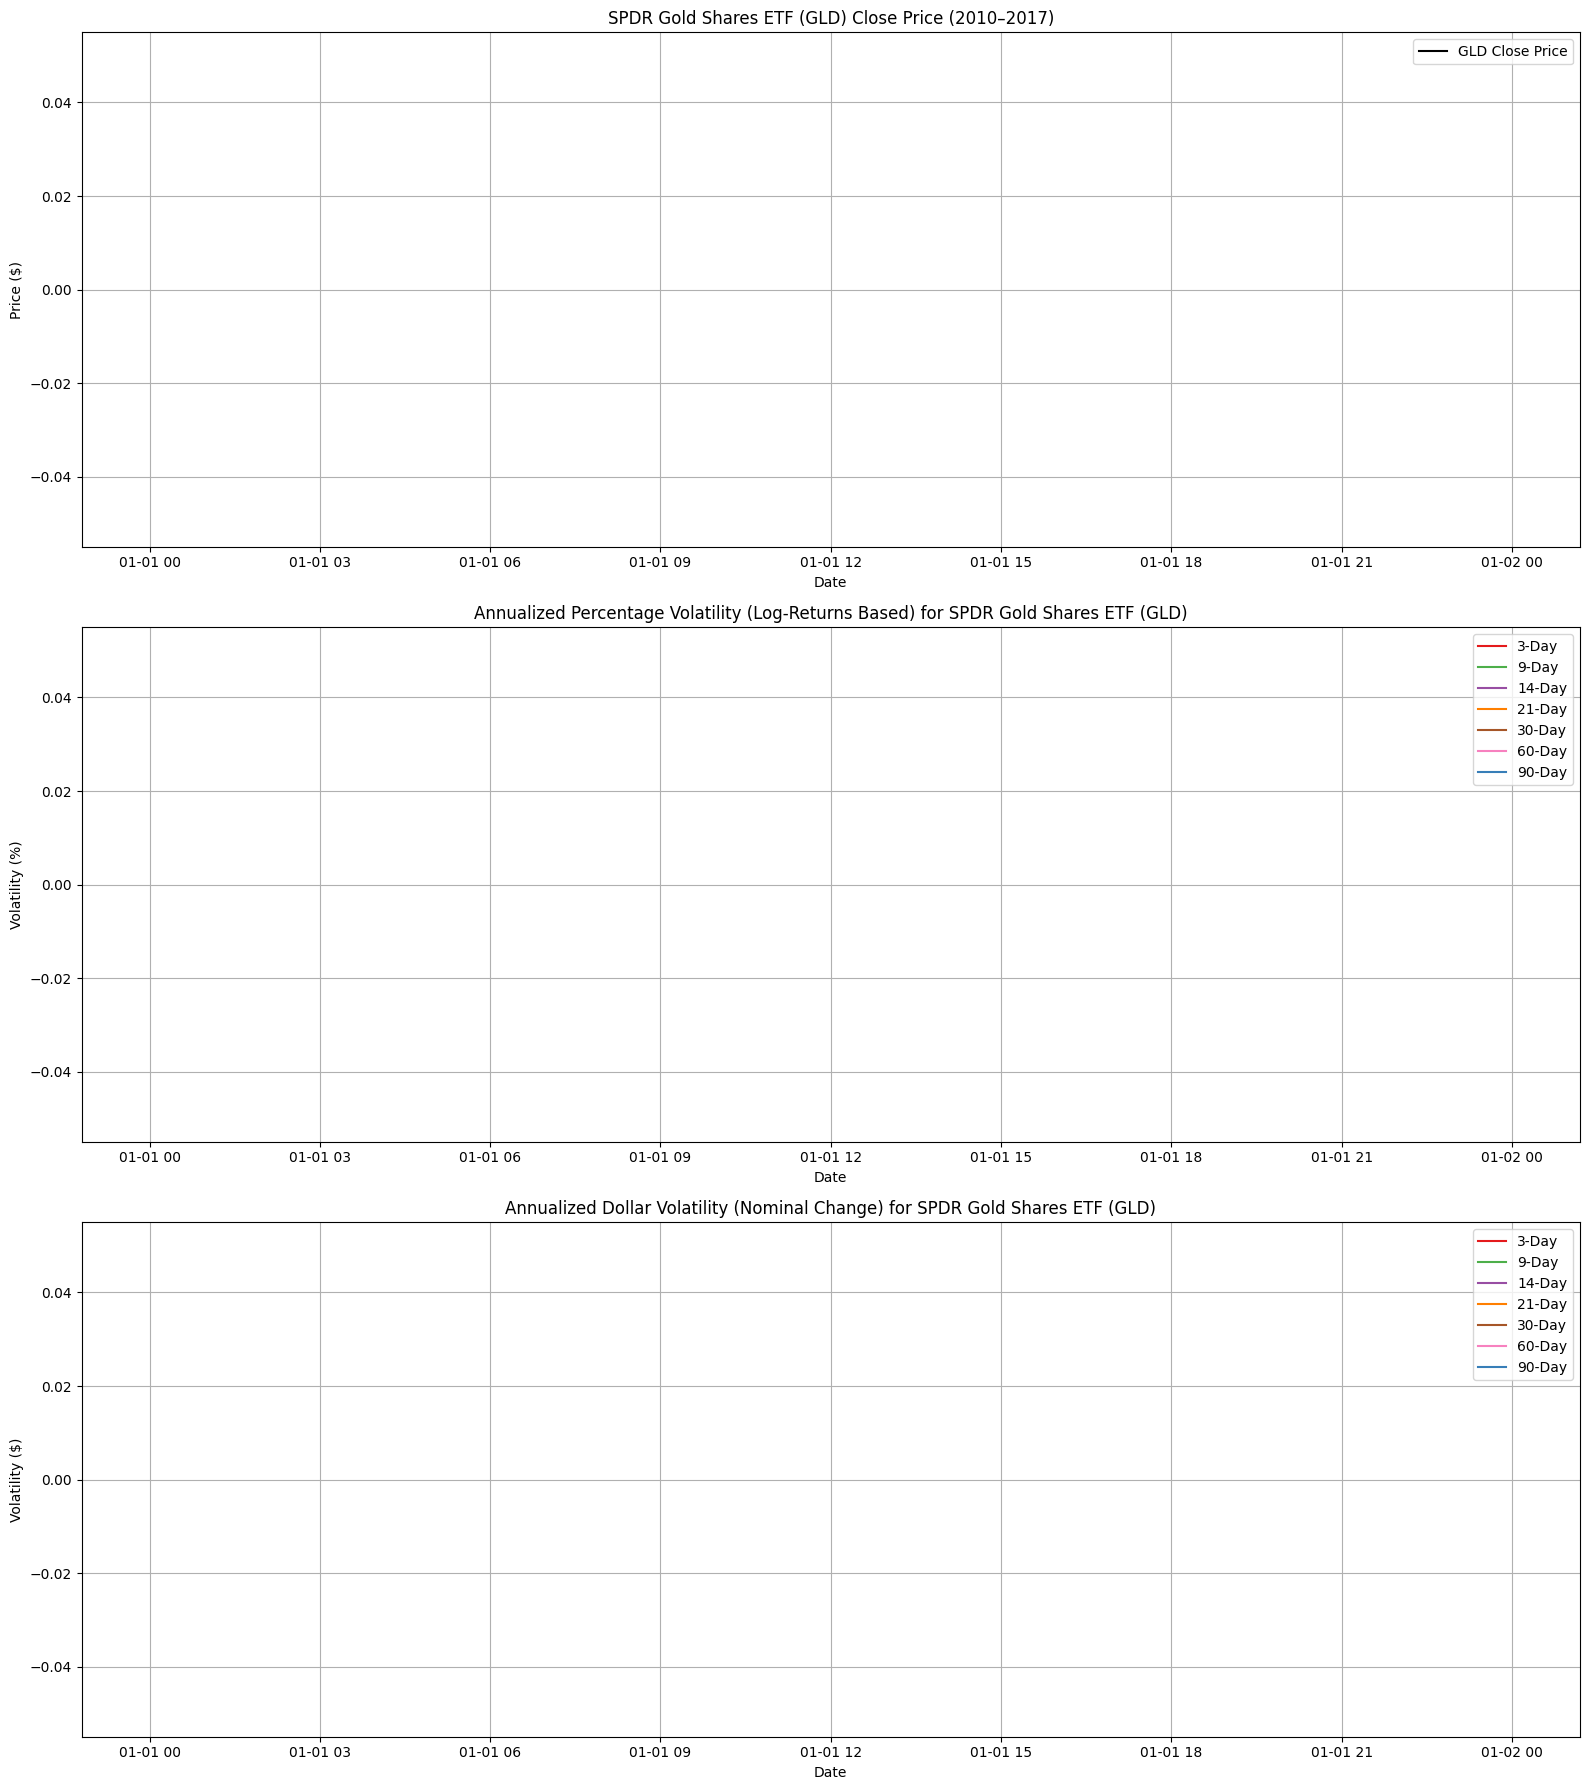

✅ Data exported to gld_volatility_data2010_2017.csv


In [6]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

ticker_symbol = 'GLD'
start_date = '2010-01-01'
end_date = '2017-12-31'
vol_windows = [3, 9, 14, 21, 30, 60, 90]

gld_data = yf.download(ticker_symbol, start=start_date, end=end_date)[['Close']]
gld_data.reset_index(inplace=True)
gld_data.columns = ['Date', 'Close']

gld_data['Log_Returns'] = np.log(gld_data['Close'] / gld_data['Close'].shift(1))

for window in vol_windows:
    rolling_std = gld_data['Log_Returns'].rolling(window=window).std()
    annualized_std = rolling_std * np.sqrt(252)

    gld_data[f'{window}_Day_Volatility'] = annualized_std * gld_data['Close']

    gld_data[f'{window}_Day_Percent_Volatility'] = annualized_std * 100 * np.sqrt(window / 252)

gld_data.dropna(inplace=True)
line_colors = [
    '#e41a1c',
    '#4daf4a',
    '#984ea3',
    '#ff7f00',
    '#a65628',
    '#f781bf',
    '#377eb8'
]


plt.figure(figsize=(16, 18))
colors = plt.cm.viridis(np.linspace(0, 1, len(vol_windows)))

plt.subplot(3, 1, 1)
plt.plot(gld_data['Date'], gld_data['Close'], color='black', label='GLD Close Price')
plt.title('SPDR Gold Shares ETF (GLD) Close Price (2010–2017)')
plt.xlabel('Date')
plt.ylabel('Price ($)')
plt.grid()
plt.legend()

plt.subplot(3, 1, 2)
for i, window in enumerate(vol_windows):
    col = f'{window}_Day_Percent_Volatility'
    plt.plot(gld_data['Date'], gld_data[col], label=f'{window}-Day', color=line_colors[i % len(line_colors)])
plt.title('Annualized Percentage Volatility (Log-Returns Based) for SPDR Gold Shares ETF (GLD)')
plt.xlabel('Date')
plt.ylabel('Volatility (%)')
plt.grid()
plt.legend()
plt.subplot(3, 1, 3)
for i, window in enumerate(vol_windows):
    col = f'{window}_Day_Volatility'
    plt.plot(gld_data['Date'], gld_data[col], label=f'{window}-Day', color=line_colors[i % len(line_colors)])
plt.title('Annualized Dollar Volatility (Nominal Change) for SPDR Gold Shares ETF (GLD)')
plt.xlabel('Date')
plt.ylabel('Volatility ($)')
plt.grid()
plt.legend()

plt.tight_layout()
plt.savefig('gld_volatility_plots.pdf')
plt.show()


export_cols = ['Date', 'Close']
export_cols += [f'{w}_Day_Volatility' for w in vol_windows]
export_cols += [f'{w}_Day_Percent_Volatility' for w in vol_windows]

gld_data[export_cols].to_csv('gld_volatility_data2010_2017.csv', index=False)
print("✅ Data exported to gld_volatility_data2010_2017.csv")